In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import  LogisticRegression


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/udemy-courses/udemy_courses.csv


# Analysing the Udemy Courses Dataset

**Objective:** To analyse the Udemy Courses dataset and draw inferences about whether factors like whether a course is paid or free, the price of the course, the level of the course, the subject of the course, the number of reviews have any impact on the number of subscribers the course has.

Moreover, a model will be trained to predict the number of subscribers for courses considering the factors mentioned above.

 ****Exploring the dataset:****

In [2]:
#reading the Udemy-Courses dataset
course_dataset=pd.read_csv('../input/udemy-courses/udemy_courses.csv')
course_dataset.shape

(3678, 12)

Thus the dataset has 3678 rows and 12 columns.

In [3]:
#Identifying the columns present in the dataset
course_dataset.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

The columns present in the dataset are : 'course_id', 'course_title', 'url', 'is_paid', 'price', 'num_subscribers', 'num_reviews',          'num_lectures', 'level', 'content_duration', 'published_timestamp' and 'subject'.

In [4]:
#checking the first five rows of the dataset 
course_dataset.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [5]:
#This displays general information about the dataset with informations like the column names their data types 
#and the count of non-null values for every column.
course_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [6]:
#dropping the columns which are not useful for the analysis
course_dataset.drop(['course_id','course_title','url','published_timestamp'],inplace = True, axis = 1)

In [7]:
#checking if there are any columns which contain null values
course_dataset.isnull().sum()

is_paid             0
price               0
num_subscribers     0
num_reviews         0
num_lectures        0
level               0
content_duration    0
subject             0
dtype: int64

So there are no null values present in any column of the dataset.

In [8]:
#This displays information about the quantitive/numerical columns, information like count, mean, standard deviation, minimum value, maximum value 
#and the quartiles are displayed 
course_dataset.describe()

,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,66.049483,3197.150625,156.259108,40.108755,4.094517
std,61.005755,9504.117010,935.452044,50.383346,6.053840
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,111.000000,4.000000,15.000000,1.000000
50%,45.000000,911.500000,18.000000,25.000000,2.000000
75%,95.000000,2546.000000,67.000000,45.750000,4.500000
max,200.000000,268923.000000,27445.000000,779.000000,78.500000


As can be noted from the descriptive statistics above that the mean values for the numerical variables are higher than the medians (i.e. mean>median), thus it confirms the presence of high skewness in these numerical/quantitative variables.

****Analysing the categorical variables****

In [9]:
#this will help in knowing the number of categories present in each categorical variable
course_dataset.select_dtypes(['object','bool']).nunique()

is_paid    2
level      4
subject    4
dtype: int64

Now as we know the number of unique categories present in each of the categorical variable, it is important to see what are the unique categories present in each of them.

In [10]:
print("Categories present in 'is_paid' variable:",course_dataset['is_paid'].unique())
print("Categories present in 'level' variable:",course_dataset['level'].unique())
print("Categories present in 'subject' variable:",course_dataset['subject'].unique())

Categories present in 'is_paid' variable: [ True False]
Categories present in 'level' variable: ['All Levels' 'Intermediate Level' 'Beginner Level' 'Expert Level']
Categories present in 'subject' variable: ['Business Finance' 'Graphic Design' 'Musical Instruments'
 'Web Development']


Lets analyse the 'is_paid' parameter to find out how many courses from the dataset are paid and how many are free.

In [11]:
#this displays the count of paid and free courses 
course_dataset['is_paid'].value_counts()

True     3368
False     310
Name: is_paid, dtype: int64

Thus out of the total 3678 courses, 3368 are paid courses and only 310 are free or unpaid.

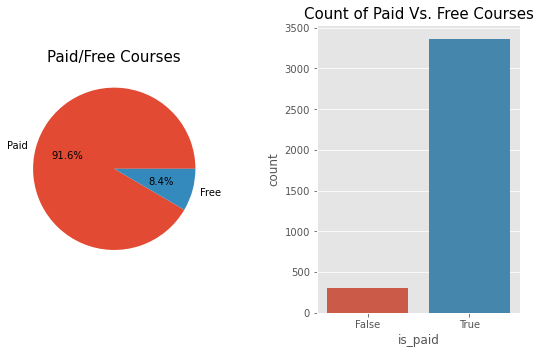

In [12]:
plt.figure(figsize=(20,5))
plt.style.use('ggplot')
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,wspace=0.5, hspace=0.2)
plt.subplot(141)
plt.title('Paid/Free Courses',fontsize = 15)
plt.pie(course_dataset['is_paid'].value_counts(),labels=['Paid','Free'],autopct="%1.1f%%")

plt.subplot(142)
plt.title('Count of Paid Vs. Free Courses',fontsize = 15)
sns.countplot(course_dataset['is_paid'])

Now we will try to analyse whether a course is paid or free has any impact on the number of subscribers

Text(0, 0.5, 'Number of subscribers')

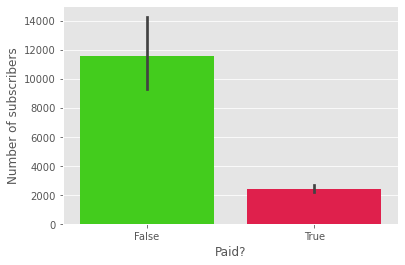

In [13]:
#this displays the number of subscribers for paid vs. free courses:
sns.barplot(y=course_dataset['num_subscribers'],x=course_dataset['is_paid'],palette='prism')
plt.style.use('ggplot')
plt.xlabel('Paid?')
plt.ylabel('Number of subscribers')

Thus we can observe that the number of subscriber is much higher incase of the free courses as compared to paid courses.

Now lets analyse the 'level' variable to find out the level of courses present in the dataset.

In [14]:
course_dataset['level'].value_counts()

All Levels            1929
Beginner Level        1270
Intermediate Level     421
Expert Level            58
Name: level, dtype: int64

Thus there are 1929 courses which belong to 'All Levels', 1270 courses from the 'Beginner Level', 421 courses from the 'Intermediate Level' and 58 courses from the 'Expert Level'.

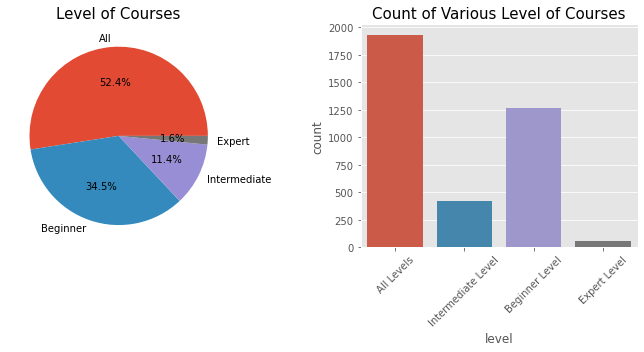

In [15]:
plt.figure(figsize=(20,5))
plt.style.use('ggplot')
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,wspace=0.5, hspace=0.2)
plt.subplot(141)
plt.title('Level of Courses',fontsize = 15)
plt.pie(course_dataset['level'].value_counts(),labels=['All','Beginner','Intermediate','Expert'],autopct="%1.1f%%")

plt.subplot(142)
plt.title('Count of Various Level of Courses',fontsize = 15)
sns.countplot(course_dataset['level'])
plt.xticks(rotation = 45)
plt.tight_layout()

Now lets see if the level of course has any impact on the number of subscribers it has

Text(0, 0.5, 'Number of subscribers')

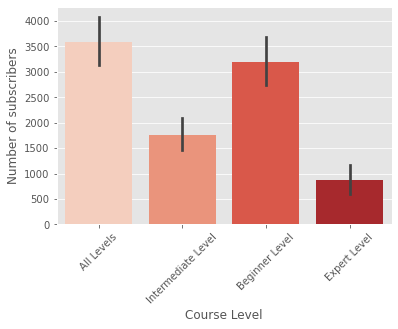

In [17]:
sns.barplot(y=course_dataset['num_subscribers'],x=course_dataset['level'],palette='Reds')
plt.style.use('ggplot')
plt.xticks(rotation=45)
plt.xlabel('Course Level')
plt.ylabel('Number of subscribers')

Thus from the above plot it can be observed that the courses which belong 'All Levels' level has the most number of subscribers whereas the course with level as 'Expert Level' has the least number of subscribers comapred to all the levels.

Now lets analyse the 'subject' parameter to find out the subjects the courses belong to

In [18]:
course_dataset['subject'].value_counts()

Web Development        1200
Business Finance       1195
Musical Instruments     680
Graphic Design          603
Name: subject, dtype: int64

Thus there are 1200 courses from the 'Web Development' subject, 1195 courses from the 'Business Finance', 680 courses from the 'Musical Instruments' subject and 603 courses from the 'Graphic Design' subject.

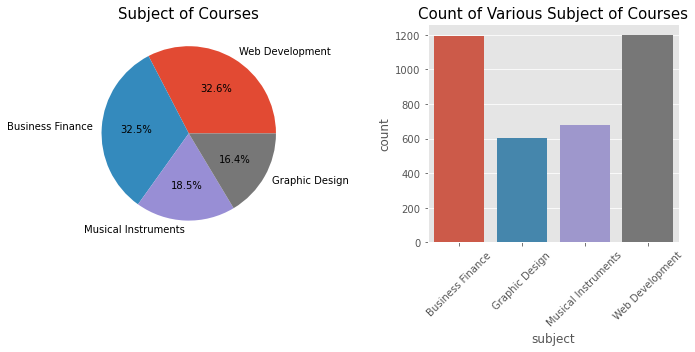

In [19]:
plt.figure(figsize=(20,5))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,wspace=0.5, hspace=0.2)
plt.style.use('ggplot')
plt.subplot(141)
plt.title('Subject of Courses',fontsize = 15)
plt.pie(course_dataset['subject'].value_counts(),labels=['Web Development','Business Finance','Musical Instruments','Graphic Design'],autopct="%1.1f%%")

plt.subplot(142)
plt.title('Count of Various Subject of Courses',fontsize = 15)
sns.countplot(course_dataset['subject'])
plt.xticks(rotation = 45)
plt.tight_layout()

Let's ananyse whether number of subscribers varies with the subject of the courses.

Text(0, 0.5, 'Number of subscribers')

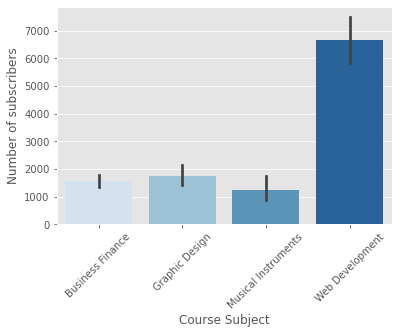

In [25]:
sns.barplot(y=course_dataset['num_subscribers'],x=course_dataset['subject'],palette='Blues')
plt.style.use('ggplot')
plt.xticks(rotation=45)
plt.xlabel('Course Subject')
plt.ylabel('Number of subscribers')

Thus we can observe that the subject 'Web Development' has the most numer of subscribers whereas the 'Musical Instruments' subject has the least subscribers among all the subjects.

Analyzing the numerical/quantitative variables:

Let's observe the distribution of the numerical/quantitative variables:

Text(0.5, 1.0, 'Distribution of Number of Subscribers')

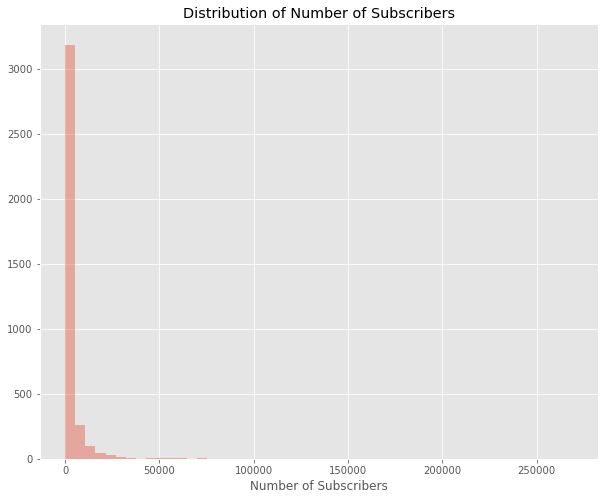

In [32]:
#this displays the distribution of the number of subscribers
plt.figure(figsize=(10,8))
plt.style.use('ggplot')
sns.distplot(course_dataset['num_subscribers'],kde=False)
plt.xlabel('Number of Subscribers')
plt.title('Distribution of Number of Subscribers')

Text(0.5, 1.0, 'Box-plot representing the distribution of number of subscribers')

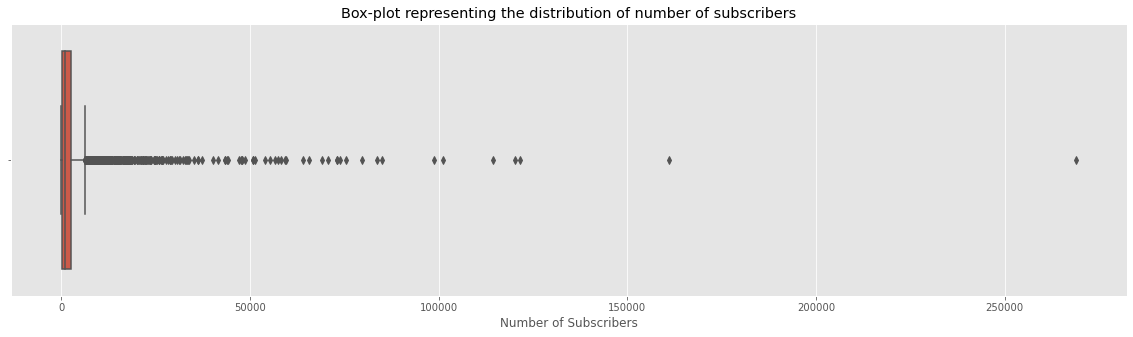

In [36]:
plt.figure(figsize=(20,5))
plt.style.use('ggplot')
sns.boxplot(course_dataset['num_subscribers'])
plt.xlabel('Number of Subscribers')
plt.title('Box-plot representing the distribution of number of subscribers')

As we observed before and also can be seen in the above plots that the numerical/quantitative variables have a high skewness and this due to the large number of outliers present in them. To visualize a normal distribution of the number of subscribers we have to take its log.


Text(0.5, 1.0, 'Normal distribution of the number of subscribers')

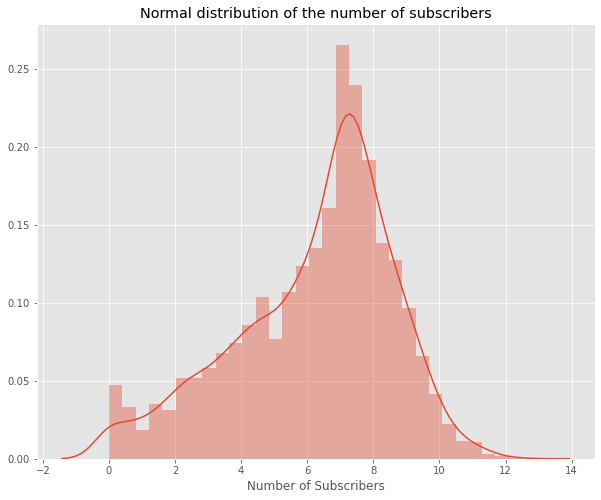

In [38]:
#this displays the distribution of the number of subscribers
plt.figure(figsize=(10,8))
plt.style.use('ggplot')
sns.distplot(np.log(course_dataset['num_subscribers']+1))
plt.xlabel('Number of Subscribers')
plt.title('Normal distribution of the number of subscribers')

Now lets observe the correlation between the number of subscribers with the other numerical variables/features of the courses.

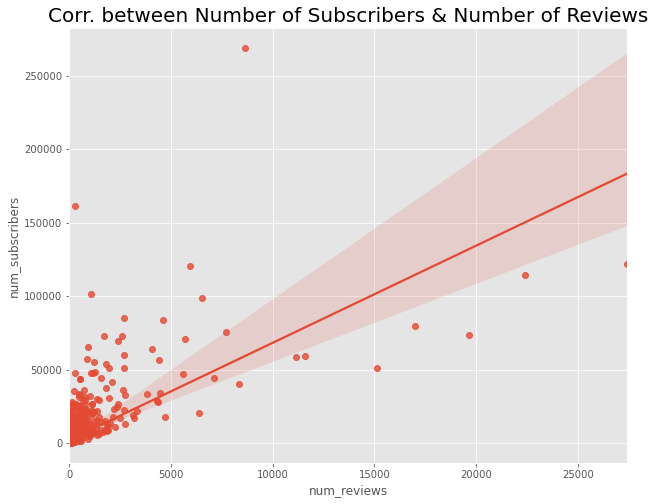

In [40]:
#this displays the Corr. between Number of Subscribers & Number of Reviews
plt.figure(figsize=(10,8))
plt.title('Corr. between Number of Subscribers & Number of Reviews',fontsize = 20)
plt.style.use('ggplot')
sns.regplot(y=course_dataset['num_subscribers'],x=course_dataset['num_reviews'])

Thus it can be observed from the above plot that there is a strong positive correlation between the number of subscribers and the numer of reviews.

(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 <a list of 9 Text major ticklabel objects>)

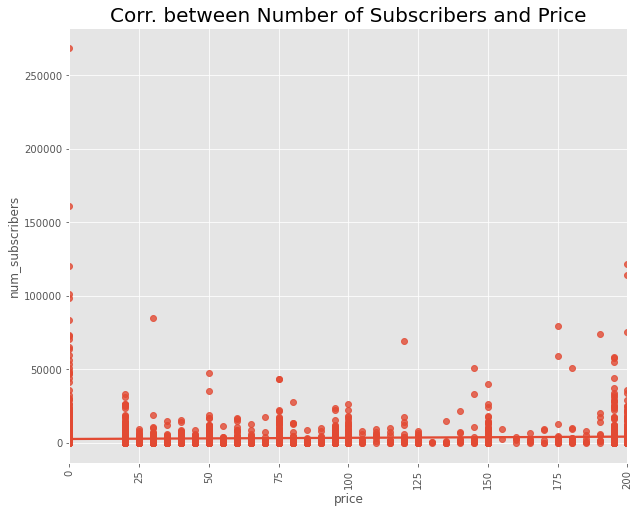

In [43]:
#this displays the Corr. between Number of Subscribers & price
plt.figure(figsize=(10,8))
plt.title('Corr. between Number of Subscribers and Price',fontsize = 20)
sns.regplot(y=course_dataset['num_subscribers'],x=course_dataset['price'])
plt.style.use('ggplot')
plt.xticks(rotation = 90)

As can be seen from the above plot that there is no correlation between the number of subscribers and price.

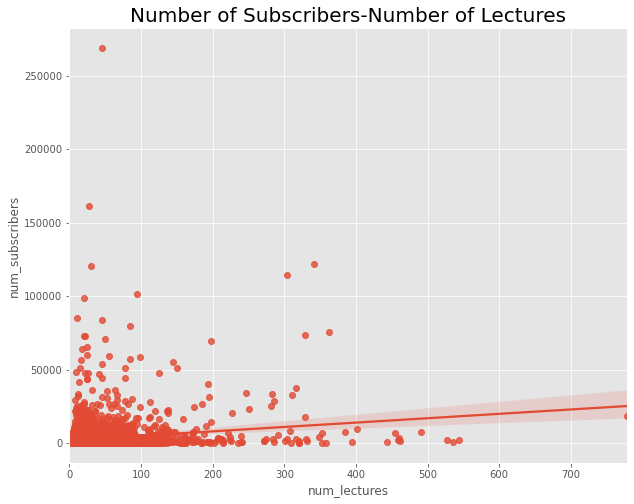

In [41]:
#this displays the Corr. between Number of Subscribers & number of lectures
plt.figure(figsize=(10,8))
plt.title('Number of Subscribers-Number of Lectures',fontsize = 20)
plt.style.use('ggplot')
sns.regplot(y=course_dataset['num_subscribers'],x=course_dataset['num_lectures'])

There is some positive correlation between the number of subscribers and the number of lectures.

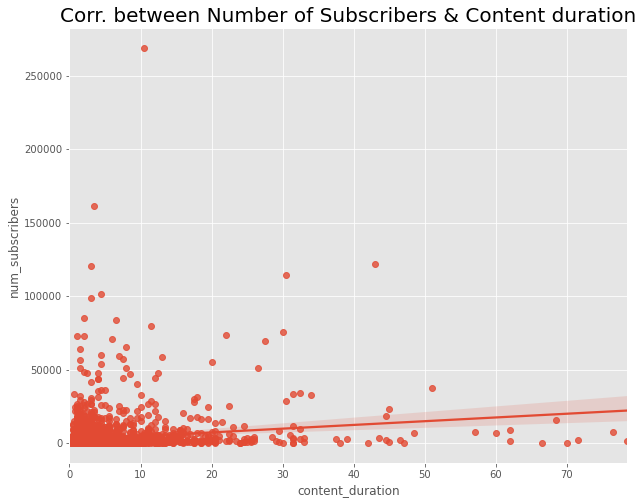

In [42]:
#this displays the Corr. between Number of Subscribers & content duration
plt.figure(figsize=(10,8))
plt.title('Corr. between Number of Subscribers & Content duration',fontsize = 20)
plt.style.use('ggplot')
sns.regplot(y=course_dataset['num_subscribers'],x=course_dataset['content_duration'])

Again, there is some correlation between the number of subcribers and the content duration.

To better visualize the correlation between the numerical parameters lets create a correlation matrix:

In [44]:
features=course_dataset[['num_subscribers','num_reviews','num_lectures','price','content_duration']]

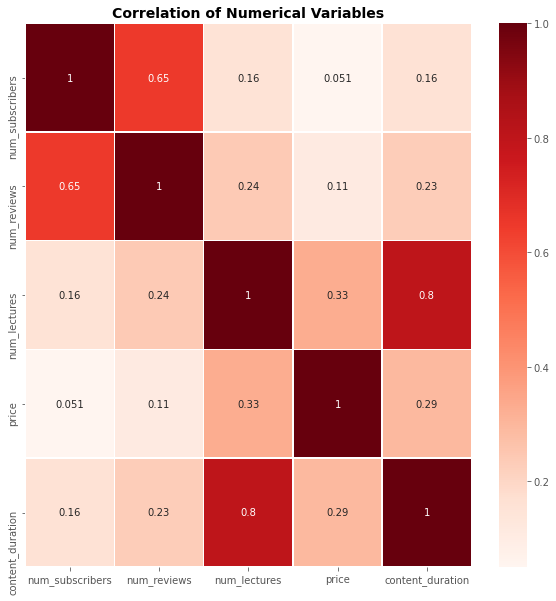

In [45]:
## correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(features.corr(), linewidths=.5, annot=True, cmap='Reds', cbar=True)
plt.title('Correlation of Numerical Variables', fontsize=14, weight='bold')
plt.style.use('ggplot')
plt.show()

Thus from the above analysis we observed that the features like whether a course is paid or free, the level of and subject of the course has an impact on the number of subscribes. We also found that there is a positive correlation between the number of subscribers and the number of reviews, the number of lectures and the content duration. But the price of the courses doesn't have any correlation with the number of subscribers as such and thus doesnot have any impact on the number of subscribers. With all these information, we will now try to train a model which once trained will be able to predict the number of subscribers given these factors.

**Predicting the number of subscribers:**

Before training a model we first need to transform the categorical variables such that they can be used for the training purpose.

In [46]:
#replacing the 'True' with 1 and the 'False' with 0 in the 'is_paid' variable 
course_dataset['is_paid']=course_dataset['is_paid'].replace({True:1,False:0})

In [49]:
#label encoding the 'level' and 'subject' columns
lb = LabelEncoder()
X_level = course_dataset['level']
X_subject = course_dataset['subject']
course_dataset['level']=lb.fit_transform(X_level)
course_dataset['subject']=lb.fit_transform(X_subject)

In [50]:
#dataset after all the transformation of the categorical columns
course_dataset.head()

,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject
0,1,200,2147,23,51,0,1.5,0
1,1,75,2792,923,274,0,39.0,0
2,1,45,2174,74,51,3,2.5,0
3,1,95,2451,11,36,0,3.0,0
4,1,200,1276,45,26,3,2.0,0


Thus as can be observed from the dataset the categorical variables have been encoded.

In [51]:
X=course_dataset[['is_paid','num_reviews','level','content_duration','subject']]

In [52]:
#target 
y=course_dataset['num_subscribers']

In [53]:
#splitting the dataset into training and testing subsets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 45)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# creating a scaler
mm = MinMaxScaler()

# feeding the independent variable into the scaler
X_train = mm.fit_transform(X_train)
X_test = mm.transform(X_test)



In [54]:
#using a Random Forest model for predicting the number of subscribers 
model=RandomForestClassifier()

Model training:

In [60]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Model predicting:

In [61]:
y_pred=model.predict(X_test)

Evaluating the model's performance:

In [64]:
#using mean square error to evaluate the performance of the model
from sklearn.metrics import mean_squared_error
mae= mean_squared_error(y_test,y_pred)
mae

31761277.841304347

If you liked the analysis please upvote and feel free to share some feedback. I'll be making more updates in the newer versions of the notebook. Thank you.